In [1]:
import pandas as pd

In [2]:
harvested = pd.read_csv('harvested_totals_by_state_year_new_5.csv')
H2A = pd.read_csv('H2A_certified_workers_by_year_state_2011_2021_5.csv')
ids = pd.read_csv('obligation_by_state_year(in).csv')
pesticide_applied = pd.read_csv('Pesticide applied acreage(in).csv')
wps = pd.read_csv('wps_agg(in).csv')

In [3]:
wps

,state,year,violations,inspections
0,alabama,2011,23,98
1,alabama,2012,20,107
2,alabama,2013,3,199
3,alabama,2014,0,239
4,alabama,2015,54,187
...,...,...,...,...
589,wisconsin,2017,98,43
590,wisconsin,2018,73,41
591,wisconsin,2019,71,50
592,wisconsin,2020,56,46


In [4]:
state_abbrev = {
    'ALABAMA': 'AL', 'ALASKA': 'AK', 'ARIZONA': 'AZ', 'ARKANSAS': 'AR', 'CALIFORNIA': 'CA',
    'COLORADO': 'CO', 'CONNECTICUT': 'CT', 'DELAWARE': 'DE', 'FLORIDA': 'FL', 'GEORGIA': 'GA',
    'HAWAII': 'HI', 'IDAHO': 'ID', 'ILLINOIS': 'IL', 'INDIANA': 'IN', 'IOWA': 'IA',
    'KANSAS': 'KS', 'KENTUCKY': 'KY', 'LOUISIANA': 'LA', 'MAINE': 'ME', 'MARYLAND': 'MD',
    'MASSACHUSETTS': 'MA', 'MICHIGAN': 'MI', 'MINNESOTA': 'MN', 'MISSISSIPPI': 'MS', 'MISSOURI': 'MO',
    'MONTANA': 'MT', 'NEBRASKA': 'NE', 'NEVADA': 'NV', 'NEW HAMPSHIRE': 'NH', 'NEW JERSEY': 'NJ',
    'NEW MEXICO': 'NM', 'NEW YORK': 'NY', 'NORTH CAROLINA': 'NC', 'NORTH DAKOTA': 'ND',
    'OHIO': 'OH', 'OKLAHOMA': 'OK', 'OREGON': 'OR', 'PENNSYLVANIA': 'PA', 'RHODE ISLAND': 'RI',
    'SOUTH CAROLINA': 'SC', 'SOUTH DAKOTA': 'SD', 'TENNESSEE': 'TN', 'TEXAS': 'TX', 'UTAH': 'UT',
    'VERMONT': 'VT', 'VIRGINIA': 'VA', 'WASHINGTON': 'WA', 'WEST VIRGINIA': 'WV',
    'WISCONSIN': 'WI', 'WYOMING': 'WY'
}
H2A.rename(columns={'YEAR': 'Year'}, inplace=True)
H2A.rename(columns={'EMPLOYER_STATE': 'State'}, inplace=True)
ids.rename(columns={'year': 'Year'}, inplace=True)
ids.rename(columns={'state': 'State'}, inplace=True)
pesticide_applied.rename(columns={'year': 'Year'}, inplace=True)
pesticide_applied.rename(columns={'state': 'State'}, inplace=True)
wps.rename(columns={'year': 'Year'}, inplace=True)
wps.rename(columns={'state': 'State'}, inplace=True)


# Map the state names to abbreviations
harvested['State'] = harvested['State'].map(state_abbrev)
pesticide_applied['State'] = pesticide_applied['State'].map(state_abbrev)
state_abbrev_lower = {k.lower(): v for k, v in state_abbrev.items()}

# Map the lowercase state names to their abbreviations
wps['State'] = wps['State'].map(state_abbrev_lower)



harvested = harvested[harvested['State'].isin(state_abbrev.values())]
H2A = H2A[H2A['State'].isin(state_abbrev.values())]
ids = ids[ids['State'].isin(state_abbrev.values())]
pesticide_applied = pesticide_applied[pesticide_applied['State'].isin(state_abbrev.values())]
wps = wps[wps['State'].isin(state_abbrev.values())]




In [5]:
from functools import reduce
import pandas as pd

# Outer join on ['State', 'Year']
merged = reduce(lambda left, right: pd.merge(left, right, on=['State', 'Year'], how='outer'), [wps, harvested, ids, H2A, pesticide_applied])

# Fill missing values

In [6]:
merged['State'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [25]:
merged.to_csv("merged.csv")

In [ ]:
from sklearn.linear_model import LinearRegression
 

In [7]:
merged

,State,Year,violations,inspections,Total Harvested Acres,Total Obligation,NUM_WORKERS_CERTIFIED,Pesticide_applied_acreage
0,AK,2007,NaN,NaN,27483.0,NaN,NaN,NaN
1,AK,2008,NaN,NaN,NaN,477249.0,NaN,NaN
2,AK,2009,NaN,NaN,NaN,342080.0,NaN,NaN
3,AK,2010,NaN,NaN,NaN,303513.0,NaN,NaN
4,AK,2011,12.0,6.0,NaN,302213.0,22.0,NaN
...,...,...,...,...,...,...,...,...
830,WY,2018,NaN,NaN,NaN,2800.0,302.0,NaN
831,WY,2019,NaN,NaN,NaN,NaN,352.0,NaN
832,WY,2020,NaN,NaN,NaN,NaN,399.0,NaN
833,WY,2021,NaN,NaN,NaN,NaN,505.0,NaN


In [ ]:
merged_filtered = merged[merged['Year']> 2011]


In [17]:
columns_to_fill = ['Total Harvested Acres', 'Pesticide_applied_acreage']

# Forward fill per state group
merged_filtered[columns_to_fill] = (
    merged_filtered.groupby('State')[columns_to_fill]
    .ffill()
)

# Optional: reset index if needed
merged_filtered = merged_filtered.reset_index(drop=True)

/var/folders/xj/3_cf3p513dxgf8tbpc4j_1j40000gn/T/ipykernel_10698/298434574.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_filtered[columns_to_fill] = (


In [19]:
merged_filtered.to_csv('merged_filtered.csv', index=False)

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows where target 'violations' is missing
df_model = merged_filtered.dropna(subset=['violations'])

# Select features (excluding non-numeric columns like State)
feature_cols = [
    'inspections',
    'Total Harvested Acres',
    'Total Obligation',
    'NUM_WORKERS_CERTIFIED',
    'Pesticide_applied_acreage'
]

X = df_model[feature_cols]
y = df_model['violations']

# Drop rows with any missing values in predictors
X = X.dropna()
y = y.loc[X.index]  # Ensure y matches X after dropping

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Coefficients:", dict(zip(feature_cols, model.coef_)))
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Coefficients: {'inspections': np.float64(0.2437347047233243), 'Total Harvested Acres': np.float64(-5.667500988184792e-07), 'Total Obligation': np.float64(1.4236507722384501e-05), 'NUM_WORKERS_CERTIFIED': np.float64(0.0018156364386166034), 'Pesticide_applied_acreage': np.float64(2.010719782503302e-07)}
Intercept: 2.1923717840571904
Mean Squared Error: 9492.823363344718
R^2 Score: 0.2629610592462567


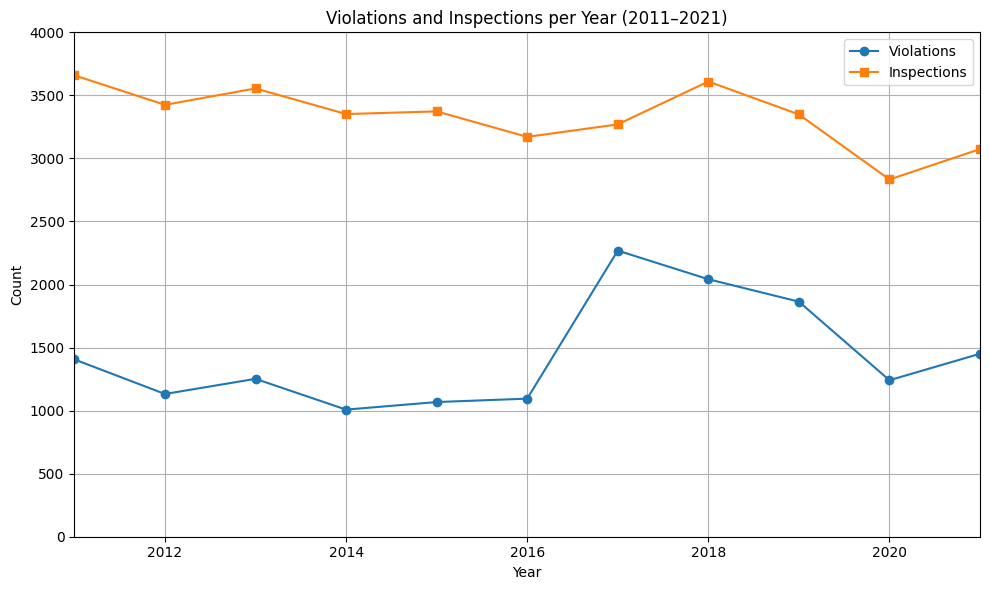

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df
# Replace this with actual loading step if reading from file
# df = pd.read_csv("yourfile.csv")

df_filtered = merged[(merged["Year"] >= 2011) & (merged["Year"] <= 2021)]

# Group by Year and sum violations and inspections
yearly_data = df_filtered.groupby("Year")[["violations", "inspections"]].sum().reset_index()

# Drop years where both are NaN
yearly_data = yearly_data.dropna(subset=["violations", "inspections"], how='all')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_data["Year"], yearly_data["violations"], label="Violations", marker='o')
plt.plot(yearly_data["Year"], yearly_data["inspections"], label="Inspections", marker='s')
plt.title("Violations and Inspections per Year (2011–2021)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xlim([2011, 2021])
plt.ylim(0, 4000)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()